# Backtesting

In [3]:
import pickle

import pandas as pd
from sklearn.model_selection import train_test_split

import utils

%load_ext autoreload
%autoreload 2

Matplotlib is building the font cache; this may take a moment.


### Data Preparation

In [4]:
# load dataset
df = pd.read_csv('../data/final_data.csv')

# sort by date
df = df.sort_values(by='date')
df

,date,State,adjusted_average_new_listings,adjusted_average_new_listings_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,off_market_in_two_weeks,off_market_in_two_weeks_yoy,adjusted_average_homes_sold,adjusted_average_homes_sold_yoy,...,months_of_supply,months_of_supply_yoy,median_pending_sqft,median_pending_sqft_yoy,average_sale_to_list_ratio,average_sale_to_list_ratio_yoy,median_sale_ppsf,median_sale_ppsf_yoy,ZORI,ZHVI
0,2016-12-30,AL,43.000000,-0.556701,52.000000,-0.174603,3.000000,-0.571429,36.000000,0.161290,...,37.555556,-11.831541,1994.000000,-0.005982,0.962797,-0.005236,99.543540,0.022577,1122.650058,216066.470760
22,2016-12-30,NM,114.313585,0.084512,134.713228,0.382836,20.912155,0.233377,49.089377,-0.202766,...,34.912703,3.409213,1581.070352,0.000619,0.968729,-0.003238,123.185945,-0.022682,1000.213260,214940.891096
23,2016-12-30,NV,73.000000,-0.401639,119.000000,-0.201342,11.000000,-0.312500,85.000000,-0.174757,...,22.976471,4.889092,1534.000000,0.009875,0.975629,-0.001425,171.276080,0.051403,1148.605311,305904.466295
24,2016-12-30,NY,151.742276,-0.169707,92.002294,-0.282131,3.498929,0.101171,96.855613,-0.176365,...,33.720803,2.649503,1349.549098,-0.060022,0.969925,0.004392,328.973719,0.029551,1895.798229,456494.835558
25,2016-12-30,OH,148.807790,-0.110787,141.400560,-0.119257,8.218554,0.395212,89.297186,-0.161583,...,30.830572,-0.016809,1560.083967,0.006244,0.960467,0.020897,76.917214,0.094313,843.742553,129419.574891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18425,2024-11-01,MA,97.090933,-0.041412,108.639851,0.122470,22.133546,0.093218,94.045135,0.329857,...,12.019740,-2.424043,1628.974114,0.013848,1.001044,-0.003737,407.260117,0.051139,2594.192374,625927.096790
18426,2024-11-01,MD,95.834211,0.211162,108.185107,0.159219,27.503864,0.048320,85.445557,0.262958,...,12.788671,-0.572449,1767.211363,-0.016668,0.998137,0.001047,221.888798,0.042522,1943.986460,396332.990533
18427,2024-11-01,ME,34.411858,0.313887,39.709881,0.830392,6.226087,0.024200,26.207115,0.097976,...,15.972631,3.528026,1569.513439,0.029284,0.975217,-0.004498,184.368299,0.006300,1536.475750,299791.577634
18416,2024-11-01,GA,25.704628,-0.165583,28.377602,-0.020919,5.882505,0.030047,21.229142,0.355209,...,21.932300,-0.595328,1743.028643,-0.022036,0.970562,-0.001474,159.285000,0.115485,1541.986132,255540.577007


### Regional Filter

In [5]:
X = df.copy()

In [6]:
# counties for each REIT
X_AVB = X[
    (X['State'] == 'CA') | (X['State'] == 'CO') | (X['State'] == 'CT') | (X['State'] == 'DC') | (
            X['State'] == 'FL') | (X['State'] == 'MD') | (X['State'] == 'MA') | (
            X['State'] == 'NJ') | (
            X['State'] == 'NY') | (X['State'] == 'NC') | (X['State'] == 'TX') | (
            X['State'] == 'VA') | (
            X['State'] == 'WA')]
X_EQR = X[
    (X['State'] == 'CA') | (X['State'] == 'CO') | (X['State'] == 'DC') | (X['State'] == 'MA') | (
            X['State'] == 'NY') | (X['State'] == 'WA')]
X_ESS = X[(X['State'] == 'CA') | (X['State'] == 'WA')]
X_INVH = X[
    (X['State'] == 'CA') | (X['State'] == 'CO') | (X['State'] == 'TX') | (X['State'] == 'NC') | (
            X['State'] == 'SC') | (X['State'] == 'GA') | (X['State'] == 'IL') | (
            X['State'] == 'FL') | (X['State'] == 'NV') | (X['State'] == 'MN') | (
            X['State'] == 'TN') | (X['State'] == 'AZ') | (X['State'] == 'WA')]

### Aggregate Rows by Date

In [7]:
X_AVB = utils.process_data(X_AVB.drop(columns='State'), utils.features_weighted, groupby='date')
X_EQR = utils.process_data(X_EQR.drop(columns='State'), utils.features_weighted, groupby='date')
X_ESS = utils.process_data(X_ESS.drop(columns='State'), utils.features_weighted, groupby='date')
X_INVH = utils.process_data(X_INVH.drop(columns='State'), utils.features_weighted, groupby='date')

### Add AlphaVantage Data

In [8]:
#Read alpha vantage data
file_path_av = "../data/av_data.csv"
df_av = pd.read_csv(file_path_av)
df_av = df_av.drop(columns=['Unnamed: 0'])
df_av

,date,SPY_adj_close,SPY_return_1day,SPY_return_1week,SPY_return_1month,SPY_return_3month,EQR_adj_close,EQR_adj_close_1day,EQR_adj_close_1week,EQR_adj_close_1month,...,AVB_adj_close_3month,INVH_adj_close,INVH_adj_close_1day,INVH_adj_close_1week,INVH_adj_close_1month,INVH_adj_close_3month,unemployment,fed_funds,3monhth_treasury_yield,cpi
0,2017-02-03,201.410539,-0.001788,0.009462,0.036496,0.045656,45.852975,45.989668,47.030055,47.402165,...,148.539775,17.272979,17.356707,17.599516,18.353064,18.018154,0.047,0.000098,0.0065,2.42839
1,2017-02-10,203.316271,0.005443,0.015464,0.027213,0.038761,47.030055,47.189531,46.764263,47.516076,...,149.262275,17.599516,17.582771,17.708362,17.900935,17.959545,0.046,0.000104,0.0066,2.43603
2,2017-02-17,206.460293,0.005955,0.008592,0.011536,0.025677,46.764263,47.402165,48.040066,47.986908,...,149.238969,17.708362,17.976290,18.260964,18.034899,17.941583,0.046,0.000102,0.0066,2.43603
3,2017-02-24,207.909361,0.001563,0.007096,-0.007860,0.016153,47.675551,48.040066,47.326224,48.178335,...,149.137974,18.085136,18.260964,18.260964,18.068390,18.193454,0.046,0.000100,0.0066,2.43603
4,2017-03-03,209.384761,-0.002978,-0.003062,-0.006931,0.017333,47.326224,47.402165,47.052837,47.627201,...,148.633001,18.260964,18.353064,17.917681,18.277709,17.933188,0.046,0.000117,0.0065,2.43603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,2024-08-16,552.612504,0.009561,0.014108,0.015389,0.083508,70.775391,70.953791,72.975662,77.078870,...,232.210000,35.000079,35.347302,35.863177,36.478257,33.830000,0.042,0.000999,0.0533,3.14796
382,2024-08-23,560.408556,-0.002384,0.002757,0.016526,0.049502,72.975662,72.281883,74.214553,76.751803,...,229.220000,35.863177,35.545716,36.547702,36.210400,34.150000,0.042,0.000990,0.0533,3.14796
383,2024-08-30,561.953809,-0.020579,-0.030638,0.021009,0.063308,74.214553,74.987622,74.432598,74.460000,...,232.900000,36.547702,36.974290,35.406826,35.260000,33.840000,0.042,0.000979,0.0533,3.14796
384,2024-09-06,538.705224,0.011196,0.040066,0.063624,0.120520,73.679352,74.432598,77.386115,73.530000,...,230.800000,35.664763,35.406826,36.726274,34.540000,33.900000,0.041,0.000968,0.0533,3.15301


In [9]:
X_AVB = pd.merge(X_AVB, df_av,
                 on=["date"],
                 how="left")
X_EQR = pd.merge(X_EQR, df_av,
                 on=["date"],
                 how="left")
X_ESS = pd.merge(X_ESS, df_av,
                 on=["date"],
                 how="left")
X_INVH = pd.merge(X_INVH, df_av,
                  on=["date"],
                  how="left")
X_AVB.dropna(inplace=True)
X_EQR.dropna(inplace=True)
X_ESS.dropna(inplace=True)
X_INVH.dropna(inplace=True)

In [10]:
# remove reit columns
columns = ['EQR_adj_close_1day', 'ESS_adj_close_1day', 'AVB_adj_close_1day', 'INVH_adj_close_1day',
           'EQR_adj_close_1week', 'ESS_adj_close_1week', 'AVB_adj_close_1week', 'INVH_adj_close_1week',
           'EQR_adj_close', 'ESS_adj_close', 'AVB_adj_close', 'INVH_adj_close', 'EQR_adj_close_1month',
           'ESS_adj_close_1month', 'AVB_adj_close_1month', 'INVH_adj_close_1month', 'EQR_adj_close_3month',
           'ESS_adj_close_3month', 'AVB_adj_close_3month', 'INVH_adj_close_3month']
X_AVB = X_AVB.drop(columns=columns)
X_EQR = X_EQR.drop(columns=columns)
X_ESS = X_ESS.drop(columns=columns)
X_INVH = X_INVH.drop(columns=columns)

### Find Backtesting Period

In [11]:
# filter backtesting period of reits (last 20% of data)
_, X_test_AVB = train_test_split(X_AVB, test_size=0.2, shuffle=False)
_, X_test_EQR = train_test_split(X_EQR, test_size=0.2, shuffle=False)
_, X_test_ESS = train_test_split(X_ESS, test_size=0.2, shuffle=False)
_, X_test_INVH = train_test_split(X_INVH, test_size=0.2, shuffle=False)

In [12]:
# find backtesting dates column sorted in ascending order
backtest_dates = X_test_AVB['date'].unique()
# remove first and last date
backtest_dates = backtest_dates[1:-1]
# print backtesting period
print(f"Backtesting period: {backtest_dates[0]} to {backtest_dates[-1]}")
print(len(backtest_dates))

Backtesting period: 2023-03-17 to 2024-09-06
76


In [13]:
# prepare output dataframe
output = pd.DataFrame(backtest_dates, columns=['date'])

## Backtesting

### Load Models

In [14]:
# load models
models = {}
with open(f'../models/AVB_ab.pkl', 'rb') as f:
    models['AVB'] = pickle.load(f)
with open(f'../models/EQR_ada.pkl', 'rb') as f:
    models['EQR'] = pickle.load(f)
with open(f'../models/ESS_ab.pkl', 'rb') as f:
    models['ESS'] = pickle.load(f)
with open(f'../models/INVH_xgb.pkl', 'rb') as f:
    models['INVH'] = pickle.load(f)

/Users/conlanfoulkes/miniconda3/envs/FINA4335/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/conlanfoulkes/miniconda3/envs/FINA4335/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostRegressor from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/conlanfoulkes/miniconda3/envs/FINA4335/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:26:39] WARNING: /User

In [15]:
# Predict and aggregate for each REIT
for reit in models.keys():
    model = models[reit]
    print(f"Predicting {reit}...")

    # filter counties for the REIT
    X_test_reit = X_test_AVB if reit == 'AVB' else X_test_EQR if reit == 'EQR' else X_test_ESS if reit == 'ESS' else X_test_INVH if reit == 'INVH' else None

    # Predict for each date
    X_test_reit[f"{reit}_pred"] = model.predict(X_test_reit.drop(columns=['date']))

    # Add actual closing prices for comparison
    output = pd.merge(
        output,
        df_av[['date', f'{reit}_adj_close']],
        on='date',
        how='left'
    )

    # Add actual closing prices for comparison
    output = pd.merge(
        output,
        df_av[['date', f'{reit}_adj_close_1week']],
        on='date',
        how='left'
    )

    # merge predictions to output
    output = pd.merge(
        output,
        X_test_reit[['date', f"{reit}_pred"]],
        on='date',
        how='left'
    )

    # add actual returns
    output[f'{reit}_returns'] = output[f'{reit}_adj_close_1week'] / output[f'{reit}_adj_close'] - 1
    # add predicted returns
    output[f'{reit}_pred_returns'] = output[f'{reit}_pred'] / output[f'{reit}_adj_close'] - 1

Predicting AVB...
Predicting EQR...
Predicting ESS...
Predicting INVH...


In [16]:
# Save output to CSV
output.to_csv("../data/REIT_predictions.csv", index=False)

print("Predictions saved to 'REIT_predictions.csv'")

Predictions saved to 'REIT_predictions.csv'


In [17]:
output.head()

,date,AVB_adj_close,AVB_adj_close_1week,AVB_pred,AVB_returns,AVB_pred_returns,EQR_adj_close,EQR_adj_close_1week,EQR_pred,EQR_returns,...,ESS_adj_close,ESS_adj_close_1week,ESS_pred,ESS_returns,ESS_pred_returns,INVH_adj_close,INVH_adj_close_1week,INVH_pred,INVH_returns,INVH_pred_returns
0,2023-03-17,151.806828,148.253922,170.460002,-0.023404,0.122874,53.483744,52.622226,61.412730,-0.016108,...,193.452474,187.458145,231.934712,-0.030986,0.198923,28.853435,27.859794,29.989807,-0.034438,0.039384
1,2023-03-24,148.253922,159.559787,174.872465,0.076260,0.179547,52.622226,56.391026,61.986711,0.071620,...,187.458145,197.482413,238.720915,0.053475,0.273462,27.859794,29.553715,31.188221,0.060802,0.119471
2,2023-03-31,159.559787,160.091463,174.284437,0.003332,0.092283,56.391026,56.485011,62.435040,0.001667,...,197.482413,199.021556,241.003295,0.007794,0.220379,29.553715,29.941708,31.064089,0.013128,0.051106
3,2023-04-14,161.268745,164.563238,176.185701,0.020429,0.092497,56.428620,57.612832,62.348522,0.020986,...,196.349302,200.579584,236.791640,0.021545,0.205971,30.471650,31.503144,31.720392,0.033851,0.040980
4,2023-04-21,164.563238,171.247166,177.297400,0.040616,0.077382,57.612832,59.445540,62.726468,0.031811,...,200.579584,207.482120,238.720915,0.034413,0.190156,31.503144,31.578850,31.523695,0.002403,0.000652


In [19]:
# Create list of return columns
return_cols = [
    'AVB_pred_returns',
    'EQR_pred_returns', 
    'ESS_pred_returns',
    'INVH_pred_returns'
]

# Get max value and corresponding REIT for each row
output['max_pred_return'] = output[return_cols].max(axis=1)
output['selected_reit'] = output[return_cols].idxmax(axis=1).str.replace('_pred_returns', '')

# Get the actual returns for the selected REIT
output['selected_actual_return'] = output.apply(
    lambda row: row[f"{row['selected_reit']}_returns"], 
    axis=1
)

output.head()

,date,AVB_adj_close,AVB_adj_close_1week,AVB_pred,AVB_returns,AVB_pred_returns,EQR_adj_close,EQR_adj_close_1week,EQR_pred,EQR_returns,...,ESS_returns,ESS_pred_returns,INVH_adj_close,INVH_adj_close_1week,INVH_pred,INVH_returns,INVH_pred_returns,max_pred_return,selected_reit,selected_actual_return
0,2023-03-17,151.806828,148.253922,170.460002,-0.023404,0.122874,53.483744,52.622226,61.412730,-0.016108,...,-0.030986,0.198923,28.853435,27.859794,29.989807,-0.034438,0.039384,0.198923,ESS,-0.030986
1,2023-03-24,148.253922,159.559787,174.872465,0.076260,0.179547,52.622226,56.391026,61.986711,0.071620,...,0.053475,0.273462,27.859794,29.553715,31.188221,0.060802,0.119471,0.273462,ESS,0.053475
2,2023-03-31,159.559787,160.091463,174.284437,0.003332,0.092283,56.391026,56.485011,62.435040,0.001667,...,0.007794,0.220379,29.553715,29.941708,31.064089,0.013128,0.051106,0.220379,ESS,0.007794
3,2023-04-14,161.268745,164.563238,176.185701,0.020429,0.092497,56.428620,57.612832,62.348522,0.020986,...,0.021545,0.205971,30.471650,31.503144,31.720392,0.033851,0.040980,0.205971,ESS,0.021545
4,2023-04-21,164.563238,171.247166,177.297400,0.040616,0.077382,57.612832,59.445540,62.726468,0.031811,...,0.034413,0.190156,31.503144,31.578850,31.523695,0.002403,0.000652,0.190156,ESS,0.034413


In [22]:
output['cumulative_return'] = (1 + output['selected_actual_return']).cumprod() - 1
print(f"Cumulative return from {output['date'].iloc[0]} to {output['date'].iloc[-1]}: {output['cumulative_return'].iloc[-1]:.2%}")

Cumulative return from 2023-03-17 to 2024-09-06: 59.78%


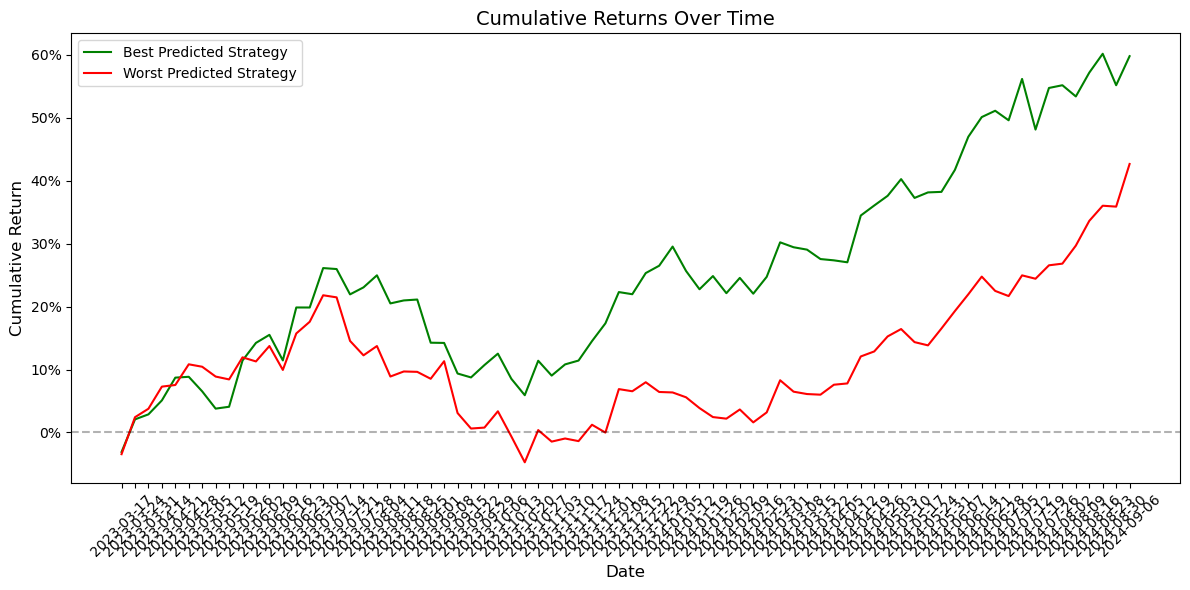

In [25]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Plot both strategies
plt.plot(output['date'], output['cumulative_return'], label='Best Predicted Strategy', color='green')
plt.plot(output['date'], output['cumulative_return_worst'], label='Worst Predicted Strategy', color='red')

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)

# Customize the plot
plt.title('Cumulative Returns Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(fontsize=10)

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [23]:
# Create list of return columns
return_cols = [
    'AVB_pred_returns',
    'EQR_pred_returns', 
    'ESS_pred_returns',
    'INVH_pred_returns'
]

# Get min value and corresponding REIT for each row
output['min_pred_return'] = output[return_cols].min(axis=1)
output['selected_reit_worst'] = output[return_cols].idxmin(axis=1).str.replace('_pred_returns', '')

# Get the actual returns for the selected REIT
output['selected_actual_return_worst'] = output.apply(
    lambda row: row[f"{row['selected_reit_worst']}_returns"], 
    axis=1
)

# Calculate cumulative return for worst strategy
output['cumulative_return_worst'] = (1 + output['selected_actual_return_worst']).cumprod() - 1

print(f"Cumulative return (worst strategy) from {output['date'].iloc[0]} to {output['date'].iloc[-1]}: {output['cumulative_return_worst'].iloc[-1]:.2%}")

Cumulative return (worst strategy) from 2023-03-17 to 2024-09-06: 42.65%


Cumulative return (60/40 weighted strategy) from 2023-03-17 to 2024-09-06: 58.61%


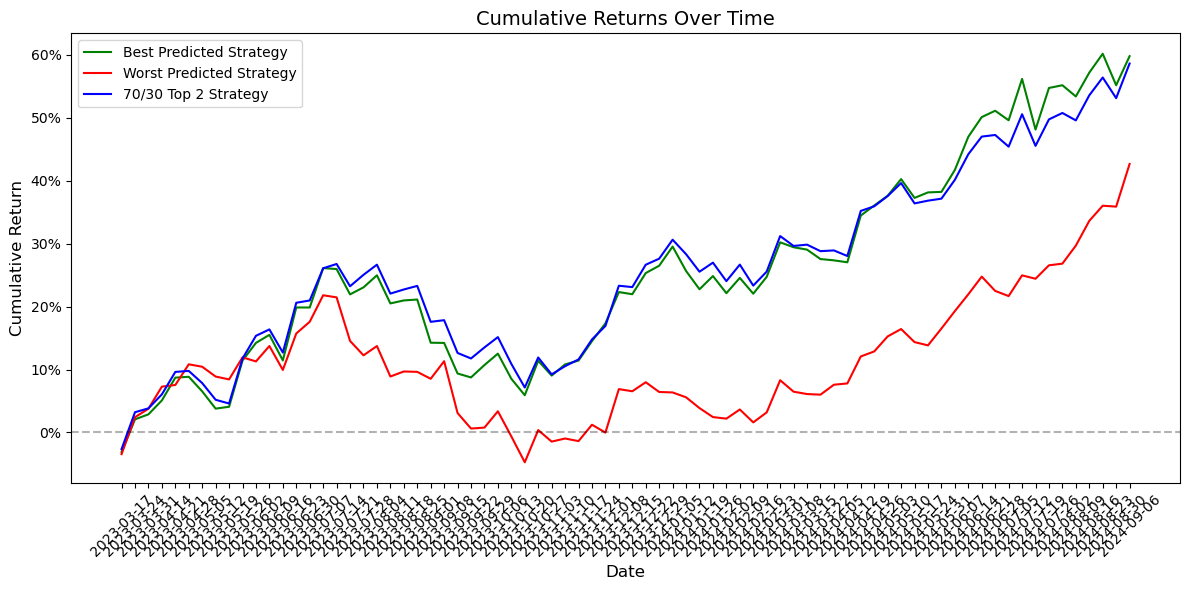

In [29]:
# Create list of return columns
return_cols = [
    'AVB_pred_returns',
    'EQR_pred_returns', 
    'ESS_pred_returns',
    'INVH_pred_returns'
]

# For each row, get the top 2 predicted returns and their corresponding REITs
output['top1_reit'] = output[return_cols].idxmax(axis=1).str.replace('_pred_returns', '')
output['top2_reit'] = output[return_cols].apply(lambda x: x.nlargest(2).index[1], axis=1).str.replace('_pred_returns', '')

# Get the actual returns for the selected REITs
output['top1_actual_return'] = output.apply(
    lambda row: row[f"{row['top1_reit']}_returns"], 
    axis=1
)
output['top2_actual_return'] = output.apply(
    lambda row: row[f"{row['top2_reit']}_returns"], 
    axis=1
)

# Calculate weighted average return (60% top1, 40% top2)
output['weighted_return'] = (0.7 * output['top1_actual_return']) + (0.3 * output['top2_actual_return'])

# Calculate cumulative return for weighted strategy
output['cumulative_return_weighted'] = (1 + output['weighted_return']).cumprod() - 1

print(f"Cumulative return (60/40 weighted strategy) from {output['date'].iloc[0]} to {output['date'].iloc[-1]}: {output['cumulative_return_weighted'].iloc[-1]:.2%}")

# Update the plot to include the new strategy
plt.figure(figsize=(12, 6))

plt.plot(output['date'], output['cumulative_return'], label='Best Predicted Strategy', color='green')
plt.plot(output['date'], output['cumulative_return_worst'], label='Worst Predicted Strategy', color='red')
plt.plot(output['date'], output['cumulative_return_weighted'], label='70/30 Top 2 Strategy', color='blue')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.title('Cumulative Returns Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(fontsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()